In [15]:
# Import required libraries
import pandas as pd
import random
from datetime import datetime, timedelta
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt


In [16]:
# Create synthetic flight delay dataset
airlines = ["Delta", "United", "Southwest", "JetBlue", "American", "AirIndia"]
airports = ["ATL", "LAX", "ORD", "DFW", "DEN", "JFK", "SFO", "LAS", "SEA", "MIA"]

records = []
for i in range(600):  # 600 rows
    airline = random.choice(airlines)
    origin = random.choice(airports)
    dest = random.choice([a for a in airports if a != origin])
    distance = random.randint(200, 2500)
    dep_delay = random.randint(-10, 180)
    arr_delay = dep_delay + random.randint(-15, 20)
    date = datetime(2023, 1, 1) + timedelta(days=random.randint(0, 90))
    
    records.append([airline, origin, dest, distance, dep_delay, arr_delay, date.strftime("%Y-%m-%d")])

# Create pandas DataFrame
df = pd.DataFrame(records, columns=["airline", "origin", "dest", "distance", "dep_delay", "arr_delay", "date"])

# Save to CSV
df.to_csv(r"C:\Users\HOME\OneDrive\Desktop\4-1\BDA Project\Flight Delay Analysis\flights_synthetic.csv", index=False)

print("✅ flights_synthetic.csv created successfully with", len(df), "records")
df.head()


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\HOME\\OneDrive\\Desktop\\4-1\\BDA Project\\Flight Delay Analysis\\flights_synthetic.csv'

In [10]:
import os
print(os.getcwd())


C:\Users\HOME\OneDrive\Desktop\4-1\BDA Project\Flight Delay Analysis


In [11]:
import os

# create a folder inside your project path
data_dir = r"C:\Users\HOME\OneDrive\Desktop\4-1\BDA Project\Flight Delay Analysis\data"
os.makedirs(data_dir, exist_ok=True)

print("✅ Data folder ready at:", data_dir)


✅ Data folder ready at: C:\Users\HOME\OneDrive\Desktop\4-1\BDA Project\Flight Delay Analysis\data


In [12]:
file_path = os.path.join(data_dir, "flights_synthetic.csv")
df.to_csv(file_path, index=False)
print("✅ flights_synthetic.csv created successfully at:", file_path)


✅ flights_synthetic.csv created successfully at: C:\Users\HOME\OneDrive\Desktop\4-1\BDA Project\Flight Delay Analysis\data\flights_synthetic.csv


In [13]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Flight Delay Analysis").getOrCreate()

path = r"C:\Users\HOME\OneDrive\Desktop\4-1\BDA Project\Flight Delay Analysis\data\flights_synthetic.csv"
df_spark = spark.read.option("header", True).option("inferSchema", True).csv(path)

df_spark.show(5)


+--------+------+----+--------+---------+---------+----------+
| airline|origin|dest|distance|dep_delay|arr_delay|      date|
+--------+------+----+--------+---------+---------+----------+
|   Delta|   DFW| MIA|    1921|       47|       64|2023-02-12|
|AirIndia|   JFK| SEA|    1534|      124|      127|2023-03-21|
|American|   JFK| SFO|    2029|      152|      152|2023-03-29|
|   Delta|   DEN| LAS|    2169|       90|       84|2023-02-22|
|   Delta|   JFK| MIA|    1241|       32|       33|2023-03-16|
+--------+------+----+--------+---------+---------+----------+
only showing top 5 rows


In [18]:
# Make sure the string is complete
test_path = r"C:\Users\HOME\OneDrive\Desktop\4-1\BDA Project\Flight Delay Analysis\test.txt"

with open(test_path, "w") as f:
    f.write("test file")

print("✅ Test file created successfully")


✅ Test file created successfully


In [19]:
import os
import pandas as pd
import random
from datetime import datetime, timedelta

# 1️⃣ Create a data folder inside your project (optional)
data_dir = r"C:\Users\HOME\OneDrive\Desktop\4-1\BDA Project\Flight Delay Analysis\data"
os.makedirs(data_dir, exist_ok=True)

# 2️⃣ Generate synthetic flight delay data
airlines = ["Delta", "United", "Southwest", "JetBlue", "American", "AirIndia"]
airports = ["ATL", "LAX", "ORD", "DFW", "DEN", "JFK", "SFO", "LAS", "SEA", "MIA"]

records = []
for i in range(600):  # 600 rows
    airline = random.choice(airlines)
    origin = random.choice(airports)
    dest = random.choice([a for a in airports if a != origin])
    distance = random.randint(200, 2500)
    dep_delay = random.randint(-10, 180)
    arr_delay = dep_delay + random.randint(-15, 20)
    date = datetime(2023, 1, 1) + timedelta(days=random.randint(0, 90))
    records.append([airline, origin, dest, distance, dep_delay, arr_delay, date.strftime("%Y-%m-%d")])

# 3️⃣ Create DataFrame
df = pd.DataFrame(records, columns=["airline", "origin", "dest", "distance", "dep_delay", "arr_delay", "date"])

# 4️⃣ Save CSV safely
file_path = os.path.join(data_dir, "flights_synthetic.csv")
df.to_csv(file_path, index=False)

print("✅ flights_synthetic.csv created successfully at:", file_path)

# 5️⃣ Quick preview
df.head()


✅ flights_synthetic.csv created successfully at: C:\Users\HOME\OneDrive\Desktop\4-1\BDA Project\Flight Delay Analysis\data\flights_synthetic.csv


,airline,origin,dest,distance,dep_delay,arr_delay,date
0,JetBlue,MIA,SFO,795,15,8,2023-03-25
1,United,JFK,DEN,2216,157,159,2023-01-09
2,United,LAS,ATL,2116,180,186,2023-03-08
3,JetBlue,ORD,DEN,1222,126,135,2023-01-22
4,JetBlue,JFK,DFW,1715,94,110,2023-02-09


In [20]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Flight Delay Analysis").getOrCreate()
df_spark = spark.read.option("header", True).option("inferSchema", True).csv(file_path)
df_spark.show(5)


+-------+------+----+--------+---------+---------+----------+
|airline|origin|dest|distance|dep_delay|arr_delay|      date|
+-------+------+----+--------+---------+---------+----------+
|JetBlue|   MIA| SFO|     795|       15|        8|2023-03-25|
| United|   JFK| DEN|    2216|      157|      159|2023-01-09|
| United|   LAS| ATL|    2116|      180|      186|2023-03-08|
|JetBlue|   ORD| DEN|    1222|      126|      135|2023-01-22|
|JetBlue|   JFK| DFW|    1715|       94|      110|2023-02-09|
+-------+------+----+--------+---------+---------+----------+
only showing top 5 rows


In [22]:
# Python imports
import os
import pandas as pd
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Spark imports
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Initialize Spark
spark = SparkSession.builder.appName("Flight Delay Analysis").getOrCreate()

# Set plotting style
sns.set(style="whitegrid")


In [23]:
# Create a data folder in your project
data_dir = r"C:\Users\HOME\OneDrive\Desktop\4-1\BDA Project\Flight Delay Analysis\data"
os.makedirs(data_dir, exist_ok=True)

# Airlines and airports
airlines = ["Delta", "United", "Southwest", "JetBlue", "American", "AirIndia"]
airports = ["ATL", "LAX", "ORD", "DFW", "DEN", "JFK", "SFO", "LAS", "SEA", "MIA"]

# Generate synthetic records
records = []
for i in range(600):  # ≥500 rows
    airline = random.choice(airlines)
    origin = random.choice(airports)
    dest = random.choice([a for a in airports if a != origin])
    distance = random.randint(200, 2500)
    dep_delay = random.randint(-10, 180)
    arr_delay = dep_delay + random.randint(-15, 20)
    date = datetime(2023, 1, 1) + timedelta(days=random.randint(0, 90))
    records.append([airline, origin, dest, distance, dep_delay, arr_delay, date.strftime("%Y-%m-%d")])

# Create pandas DataFrame
df = pd.DataFrame(records, columns=["airline", "origin", "dest", "distance", "dep_delay", "arr_delay", "date"])

# Save CSV
file_path = os.path.join(data_dir, "flights_synthetic.csv")
df.to_csv(file_path, index=False)
print("✅ flights_synthetic.csv created successfully at:", file_path)

# Quick preview
df.head()


✅ flights_synthetic.csv created successfully at: C:\Users\HOME\OneDrive\Desktop\4-1\BDA Project\Flight Delay Analysis\data\flights_synthetic.csv


,airline,origin,dest,distance,dep_delay,arr_delay,date
0,American,SEA,MIA,868,47,66,2023-02-01
1,AirIndia,SFO,DFW,1655,131,150,2023-02-03
2,American,SFO,ATL,1089,162,154,2023-03-11
3,Southwest,LAX,SEA,2166,106,123,2023-01-12
4,United,LAX,DFW,1316,82,88,2023-02-04


In [24]:
# Load CSV into Spark DataFrame
df_spark = spark.read.option("header", True).option("inferSchema", True).csv(file_path)

# Show schema and top rows
df_spark.printSchema()
df_spark.show(5, truncate=False)
print("Total rows:", df_spark.count())


root
 |-- airline: string (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- distance: integer (nullable = true)
 |-- dep_delay: integer (nullable = true)
 |-- arr_delay: integer (nullable = true)
 |-- date: date (nullable = true)

+---------+------+----+--------+---------+---------+----------+
|airline  |origin|dest|distance|dep_delay|arr_delay|date      |
+---------+------+----+--------+---------+---------+----------+
|American |SEA   |MIA |868     |47       |66       |2023-02-01|
|AirIndia |SFO   |DFW |1655    |131      |150      |2023-02-03|
|American |SFO   |ATL |1089    |162      |154      |2023-03-11|
|Southwest|LAX   |SEA |2166    |106      |123      |2023-01-12|
|United   |LAX   |DFW |1316    |82       |88       |2023-02-04|
+---------+------+----+--------+---------+---------+----------+
only showing top 5 rows
Total rows: 600


In [25]:
numeric_cols = ["distance","dep_delay","arr_delay"]

# Count, mean, stddev
df_spark.select(
    [F.count(c).alias(c+"_count") for c in numeric_cols] +
    [F.mean("dep_delay").alias("dep_delay_mean"), 
     F.stddev("dep_delay").alias("dep_delay_sd")]
).show()


+--------------+---------------+---------------+-----------------+------------------+
|distance_count|dep_delay_count|arr_delay_count|   dep_delay_mean|      dep_delay_sd|
+--------------+---------------+---------------+-----------------+------------------+
|           600|            600|            600|85.77166666666666|54.050704543588694|
+--------------+---------------+---------------+-----------------+------------------+



In [26]:
# Count nulls per column
df_spark.select([F.count(F.when(F.col(c).isNull(), c)).alias(c+"_nulls") for c in df_spark.columns]).show()


+-------------+------------+----------+--------------+---------------+---------------+----------+
|airline_nulls|origin_nulls|dest_nulls|distance_nulls|dep_delay_nulls|arr_delay_nulls|date_nulls|
+-------------+------------+----------+--------------+---------------+---------------+----------+
|            0|           0|         0|             0|              0|              0|         0|
+-------------+------------+----------+--------------+---------------+---------------+----------+



In [28]:
# Remove rows with nulls (if any)
df_clean = df_spark.dropna()

# Remove negative distances if any
df_clean = df_clean.filter(F.col("distance") > 0)

print("Total rows after cleaning:", df_clean.count())
df_clean.show(5)


Total rows after cleaning: 600
+---------+------+----+--------+---------+---------+----------+
|  airline|origin|dest|distance|dep_delay|arr_delay|      date|
+---------+------+----+--------+---------+---------+----------+
| American|   SEA| MIA|     868|       47|       66|2023-02-01|
| AirIndia|   SFO| DFW|    1655|      131|      150|2023-02-03|
| American|   SFO| ATL|    1089|      162|      154|2023-03-11|
|Southwest|   LAX| SEA|    2166|      106|      123|2023-01-12|
|   United|   LAX| DFW|    1316|       82|       88|2023-02-04|
+---------+------+----+--------+---------+---------+----------+
only showing top 5 rows


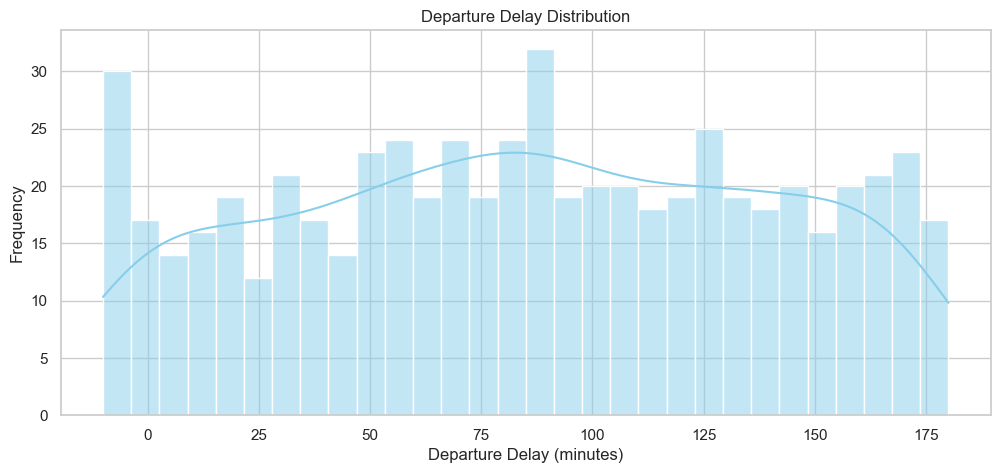

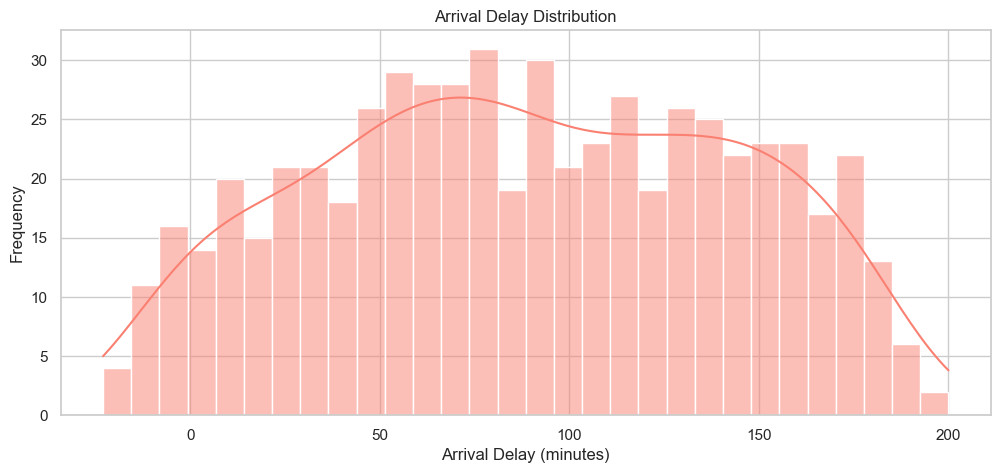

In [29]:
# Convert to Pandas for plotting
df_pd = df_clean.toPandas()

plt.figure(figsize=(12,5))
sns.histplot(df_pd['dep_delay'], bins=30, kde=True, color='skyblue')
plt.title("Departure Delay Distribution")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df_pd['arr_delay'], bins=30, kde=True, color='salmon')
plt.title("Arrival Delay Distribution")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.show()


In [30]:
# Count flights per origin
busiest_origins = df_clean.groupBy("origin").count().orderBy(F.desc("count"))
busiest_origins.show()

# Count flights per destination
busiest_dest = df_clean.groupBy("dest").count().orderBy(F.desc("count"))
busiest_dest.show()


+------+-----+
|origin|count|
+------+-----+
|   LAX|   81|
|   LAS|   67|
|   JFK|   59|
|   DEN|   59|
|   ATL|   59|
|   DFW|   58|
|   SEA|   58|
|   MIA|   57|
|   ORD|   53|
|   SFO|   49|
+------+-----+

+----+-----+
|dest|count|
+----+-----+
| MIA|   70|
| SEA|   70|
| ORD|   63|
| DEN|   62|
| LAS|   60|
| DFW|   58|
| ATL|   58|
| SFO|   55|
| JFK|   54|
| LAX|   50|
+----+-----+



C:\Users\HOME\AppData\Local\Temp\ipykernel_24528\1476018363.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='origin', y='count', data=origin_pd, palette="Blues_d")


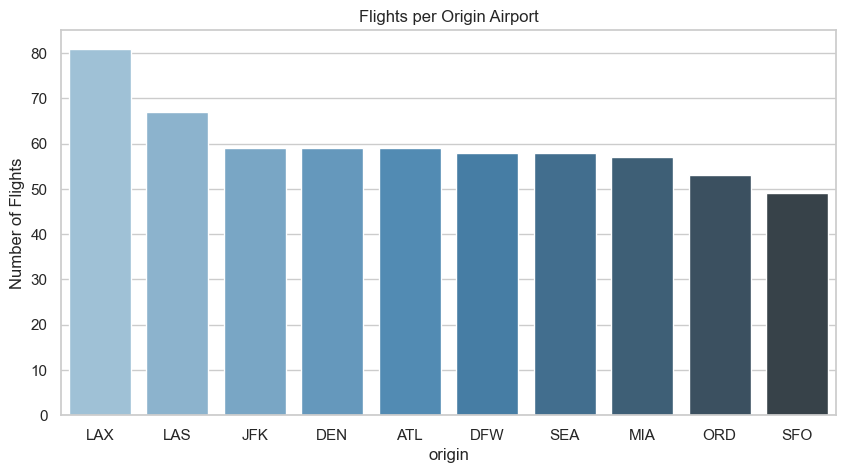

C:\Users\HOME\AppData\Local\Temp\ipykernel_24528\1476018363.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dest', y='count', data=dest_pd, palette="Reds_d")


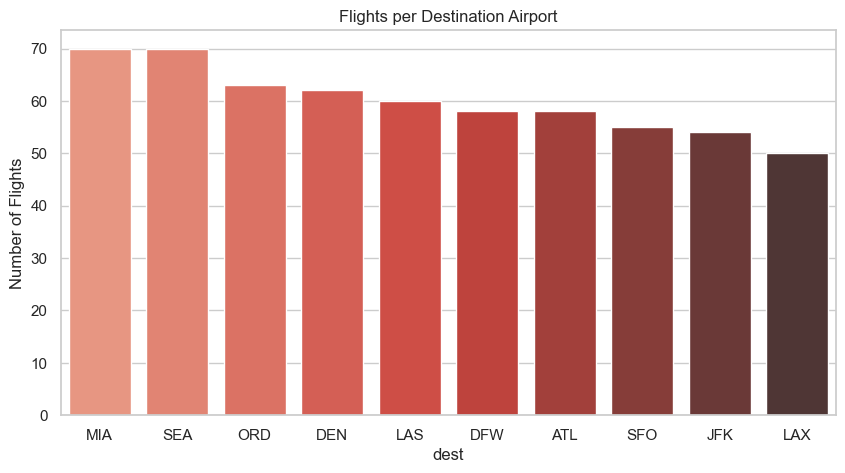

In [31]:
# Convert to Pandas
origin_pd = busiest_origins.toPandas()
dest_pd = busiest_dest.toPandas()

plt.figure(figsize=(10,5))
sns.barplot(x='origin', y='count', data=origin_pd, palette="Blues_d")
plt.title("Flights per Origin Airport")
plt.ylabel("Number of Flights")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='dest', y='count', data=dest_pd, palette="Reds_d")
plt.title("Flights per Destination Airport")
plt.ylabel("Number of Flights")
plt.show()


+---------+-----------------+-----------------+
|  airline|    avg_dep_delay|    avg_arr_delay|
+---------+-----------------+-----------------+
|    Delta|90.22222222222223|92.41111111111111|
|  JetBlue|87.09708737864078|89.71844660194175|
|Southwest|86.91666666666667|89.68333333333334|
|   United|85.66990291262135|89.10679611650485|
| AirIndia|82.83673469387755|85.24489795918367|
| American| 81.3953488372093|84.36046511627907|
+---------+-----------------+-----------------+



C:\Users\HOME\AppData\Local\Temp\ipykernel_24528\3393542916.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airline', y='avg_dep_delay', data=avg_pd, palette="coolwarm")


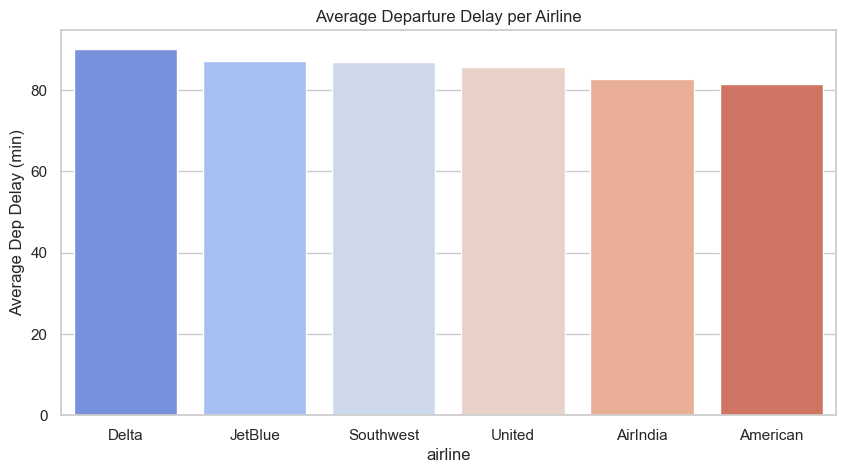

In [32]:
avg_delay_airline = df_clean.groupBy("airline").agg(
    F.mean("dep_delay").alias("avg_dep_delay"),
    F.mean("arr_delay").alias("avg_arr_delay")
).orderBy("avg_dep_delay", ascending=False)

avg_delay_airline.show()

# Plot
avg_pd = avg_delay_airline.toPandas()
plt.figure(figsize=(10,5))
sns.barplot(x='airline', y='avg_dep_delay', data=avg_pd, palette="coolwarm")
plt.title("Average Departure Delay per Airline")
plt.ylabel("Average Dep Delay (min)")
plt.show()
